In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# Importing pearson's 'r'
from scipy.stats import pearsonr
import scipy.stats as stats

In [2]:
temps = np.array([209.5, 214.5, 219.5, 224, 230.5, 235.5, 240.5, 246, 248.5])
tempErrs = np.array([0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 1, 1.5])

gains = np.array([0.04226, 0.04222, 0.04221, 0.04213, 0.04205, 0.04206, 0.04198, 0.04192, 0.04193])
gainErrs = np.array([7.14426E-7, 7.47451E-7, 6.81591E-7, 7.14683E-7, 8.07E-7, 7.18898E-7, 7.6E-7, 8.09079E-7, 8.33641E-7])
oGainErrs = np.sqrt(gainErrs**2 + tempErrs**2)

offsets = np.array([-0.08422, -0.08744, -0.10401, -0.08905, -0.09571, -0.12331, -0.12024, -0.09997, -0.10589])
offsetErrs = np.array([2.99652E-4, 3.14468E-4, 3.0206E-4, 2.93175E-4, 3.46133E-4, 3.2918E-4, 3.3498E-4, 3.50759E-4, 3.63121E-4])
oOffsetErrs = np.sqrt(offsetErrs**2 + tempErrs**2)

In [3]:
def linear(x, m, b):
    return m*x + b

[0.04226 0.04222 0.04221 0.04213 0.04205 0.04206 0.04198 0.04192 0.04193]
[0.04227067 0.04222504 0.0421794  0.04213833 0.04207901 0.04203337
 0.04198774 0.04193754 0.04191472]
[0.5 0.5 0.5 1.  0.5 0.5 0.5 1.  1.5]


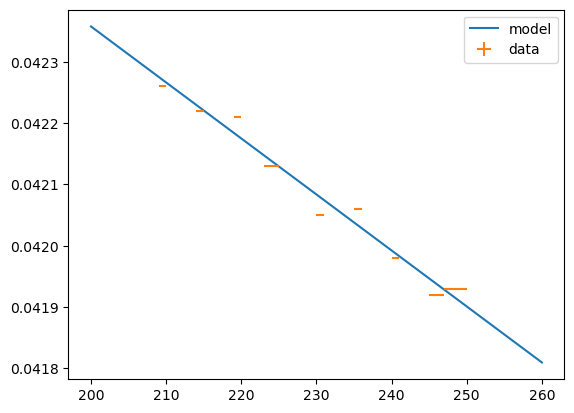

In [4]:
tempsLine = np.linspace(200, 260, num=100)

poptGain, pcovGain = curve_fit(linear, temps, gains, sigma=oGainErrs)

mGain, bGain = poptGain
gainPred = mGain*temps + bGain

gainsLine = mGain*tempsLine + bGain

print(gains)
print(gainPred)
print(oGainErrs)

plt.plot(tempsLine, gainsLine, label='model')
plt.errorbar(temps, gains, xerr=tempErrs, yerr=gainErrs, linestyle='', label='data')

plt.legend()
plt.show()

In [5]:
Chi_sq = np.sum(((gains-gainPred)/oGainErrs)**2)
Red_chi_sq = Chi_sq/(len(temps)-2)

print(f'Chi-sq: {Chi_sq:.5g}')
print(f'Reduced chi-sq: {Red_chi_sq:.5g}')

Chi-sq: 1.1224e-08
Reduced chi-sq: 1.6034e-09


In [6]:
prob = pearsonr(temps, gains)[1]

print(f"{prob*100:.3g}%")

7.44e-05%


[-0.08422 -0.08744 -0.10401 -0.08905 -0.09571 -0.12331 -0.12024 -0.09997
 -0.10589]
[-0.0858694  -0.09069567 -0.09552194 -0.09986559 -0.10613974 -0.11096601
 -0.11579228 -0.12110118 -0.12351432]
[0.50000009 0.5000001  0.50000009 1.00000004 0.50000012 0.50000011
 0.50000011 1.00000006 1.50000004]


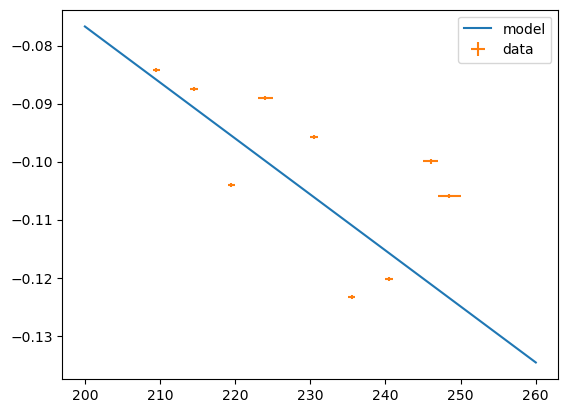

In [7]:
poptOffset, pcovOffset = curve_fit(linear, temps, offsets, sigma=oOffsetErrs)

mOffset, bOffset = poptOffset
offsetPred = mOffset*temps + bOffset

offsetsLine = mOffset*tempsLine + bOffset

print(offsets)
print(offsetPred)
print(oOffsetErrs)

plt.plot(tempsLine, offsetsLine, label='model')
plt.errorbar(temps, offsets, xerr=tempErrs, yerr=offsetErrs, linestyle='', label='data')

plt.legend()
plt.show()

In [8]:
Chi_sq = np.sum(((offsets-offsetPred)/oOffsetErrs)**2)
Red_chi_sq = Chi_sq/(len(temps)-2)

print(f'Chi-sq: {Chi_sq:.5g}')
print(f'Reduced chi-sq: {Red_chi_sq:.5g}')

Chi-sq: 0.0021668
Reduced chi-sq: 0.00030954


In [9]:
prob = pearsonr(temps, offsets)[1]

print(f"{prob*100:.3g}%")

6.21%


In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(temps, offsets)

print(f"{r_value**2:.7g}")

0.4126957
